### This is just an example of how to graph the data provided by the sensor 

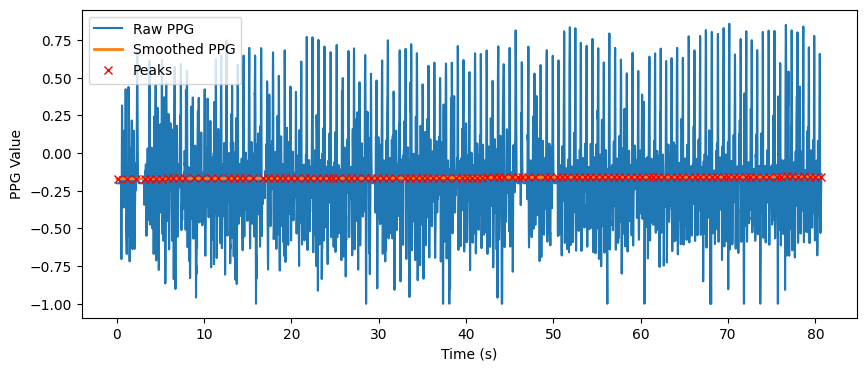

Estimated BPM: 85.53817801325432


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import uniform_filter1d  
import pandas as pd

# Load the data
df = pd.read_csv('ppg_data.csv')


time=df['Time (s)']
ppg=df['PPG Value']

# Smooth the PPG signal using a moving average filter
ppg_smooth = uniform_filter1d(ppg, len(ppg))  

# Determine the sampling rate (assumes time is in seconds)
fs = 1 / np.mean(np.diff(time))
# Set a minimum peak distance of 0.5 seconds (in samples)
min_distance = int(0.5 * fs)

# Detect peaks in the smoothed PPG signal
peaks, properties = find_peaks(ppg_smooth, distance=min_distance)

# Plot 
plt.figure(figsize=(10, 4))
plt.plot(time, ppg, label='Raw PPG')
plt.plot(time, ppg_smooth, label='Smoothed PPG', linewidth=2)
plt.plot(time[peaks], ppg_smooth[peaks], 'rx', label='Peaks')
plt.xlabel('Time (s)')
plt.ylabel('PPG Value')
plt.legend()
plt.show()

# Compute BPM:
total_time = time[0] - time[len(time)-2]  # total time in seconds
num_beats = len(peaks)
BPM = -num_beats * 60 / total_time

print("Estimated BPM:", BPM)
